In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

Run this to remove the nans from any inventories to ensure they work with HEMCO. There are plot tests below to check that the new dataset doesn't mess up any of the data.

In [16]:
#import dataset
#choose one of the datasets below, or enter a new name
#data_path = 'inventory_power_plants_final.nc' 
#data_path = 'inventory_power_plants_no-nuclear.nc' 
#data_path = 'inventory_power_plants_egrid.nc'
data_path = '../annual_emissions/inventory_power_plants_no-nuclear_no-coal_lim_NOx.nc'

ds = xr.open_dataset(data_path)

In [3]:
ds_mod = ds.fillna(0)

In [4]:
#choose a pollutant to look at as our test
poll = 'NO'

In [5]:
#check that there are no longer nans in the new dataset
np.unique(np.isnan(ds_mod.isel(time = slice(-48,-24))[poll]).values)

array([False])

In [6]:
#compare to the old dataset (should have True and False)
np.unique(np.isnan(ds.isel(time = slice(-48,-24))[poll]).values)

array([False,  True])

Text(0.5, 1.0, 'New Dataset, 1 = True, 0 = False')

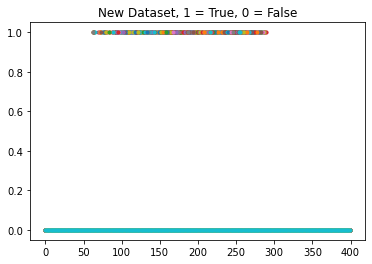

In [7]:
plt.plot(np.isnan(ds.isel(time = slice(-100,-90))[poll]).values[0], '.');
plt.title('Old Dataset, 1 = True, 0 = False')
plt.plot(np.isnan(ds_mod.isel(time = slice(-48,-24))[poll]).values[0], '.');
plt.title('New Dataset, 1 = True, 0 = False')


Text(0.5, 1.0, 'New Dataset')

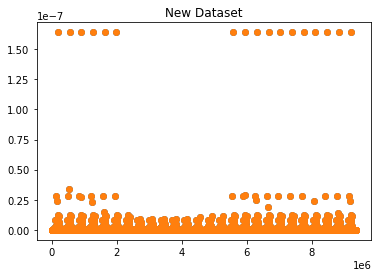

In [8]:
#plot a time slice to check that the values stay the same in the old and new
plt.plot((ds.isel(time = slice(-50,-24))[poll]).values.ravel(), 'o')
plt.title('Old Dataset')
plt.plot((ds_mod.isel(time = slice(-50,-24))[poll]).values.ravel(), 'o')
plt.title('New Dataset')

In [15]:
#save out our dataset (you may have to delete the old one first)
ds_mod.to_netcdf(data_path, mode = 'w')

IOStream.flush timed out
